In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

# Create a directory and move the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
 96% 951M/991M [00:09<00:00, 164MB/s]
100% 991M/991M [00:09<00:00, 108MB/s]


In [5]:
import zipfile



# Unzip the dataset
with zipfile.ZipFile("dog-vs-cat-images-data.zip", 'r') as zip_ref:
    zip_ref.extractall("dog_cat")




In [6]:
import matplotlib.pyplot as plt
import cv2
import os

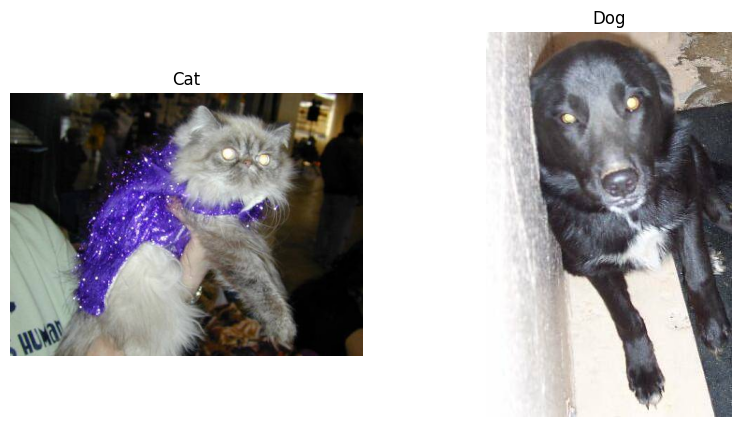

In [8]:
# Set image paths
cat_img_path = '/content/dog_cat/dogcat/train/cats/cat.10013.jpg'
dog_img_path = '/content/dog_cat/dogcat/train/dogs/dog.10000.jpg'

# Load using OpenCV
cat_img = cv2.imread(cat_img_path)
dog_img = cv2.imread(dog_img_path)

# Convert BGR to RGB (OpenCV loads in BGR by default)
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)

# Plot them
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cat_img)
plt.title("Cat")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_img)
plt.title("Dog")
plt.axis('off')

plt.show()


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [10]:
#generators - divide dataset into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dog_cat/dogcat/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dog_cat/dogcat/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [11]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(512,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,537,089 (51.64 MB)

 Trainable params: 13,537,089 (51.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=10,validation_data = validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - accuracy: 0.5573 - loss: 0.6810 - val_accuracy: 0.7336 - val_loss: 0.5340
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7634 - loss: 0.4943 - val_accuracy: 0.8388 - val_loss: 0.3686
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 85ms/step - accuracy: 0.8237 - loss: 0.3857 - val_accuracy: 0.8650 - val_loss: 0.3091
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8785 - loss: 0.2856 - val_accuracy: 0.9072 - val_loss: 0.2269
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9201 - loss: 0.1918 - val_accuracy: 0.9084 - val_loss: 0.2207
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step - accuracy: 0.9543 - loss: 0.1187 - val_accuracy: 0.9560 - val_loss: 0.1093
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.9712 - loss: 0.0771 - val_accuracy: 0.9653 - val_loss: 0.1005
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 84ms/step - accuracy: 0.9738 - loss: 0.0732 -

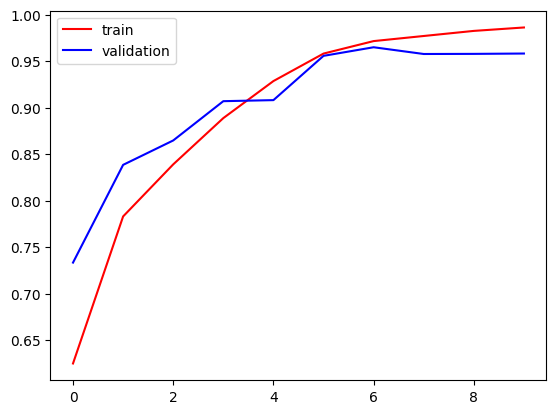

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

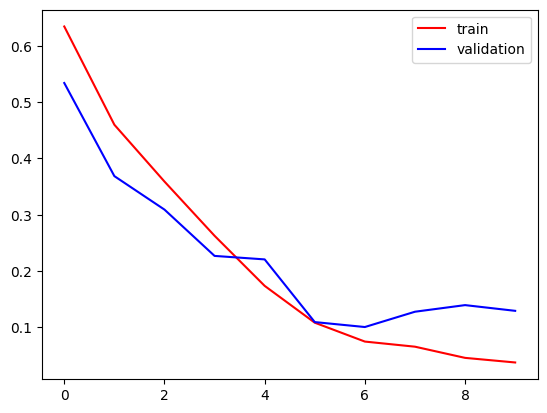

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [20]:
import numpy as np

In [25]:
def show_prediction(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Image not found: {img_path}")
        return

    img_resized = cv2.resize(img, (254, 254))  # change to correct size
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_input = img_resized / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    pred = model.predict(img_input)[0][0]
    label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label} ({pred:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


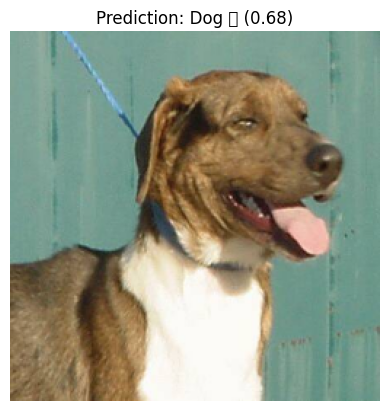

In [37]:
show_prediction('/content/dog_cat/dogcat/train/dogs/dog.10699.jpg', model)